In [6]:
#merging files 
import pandas as pd
import glob

# Get all raw data files from folder
raw_data_files = glob.glob("/Users/naima.abdirahman/Downloads/project3data/*.csv")

# Initialize master list
master = []

# Going through every file in folder, creating and cleaning data, and appending to df
for file in raw_data_files:
    df = pd.read_csv(file)

    # Adding necessary columns
    df["filename"] = file
    df["user"] = file.split("/")[-1].split(".")[0]  # Extracting user from filename
    df["saved"] = "saved" in file.lower()

    master.append(df)

# Concatenating the files together into master dataframe
df = pd.concat(master, axis=0, ignore_index=True)

# Saving to CSV
df.to_csv("/Users/naima.abdirahman/Downloads/project3data/metadata.csv", index=False)

 

In [9]:
df.head()

,video_id,video_timestamp,video_duration,video_locationcreated,suggested_words,video_diggcount,video_sharecount,video_commentcount,video_playcount,video_description,...,author_followercount,author_followingcount,author_heartcount,author_videocount,author_diggcount,author_verified,filename,user,saved,Unnamed: 0
0,7302601347327905070,2023-11-17T20:03:14,66.0,US,NaN,19400.0,40.0,86.0,147000.0,Talk about a humbling experience. Got a dress ...,...,NaN,NaN,NaN,NaN,NaN,False,/Users/naima.abdirahman/Downloads/project3data...,results_50405_full,False,NaN
1,7326753111513632043,2024-01-21T22:04:30,13.0,US,"yeslydimate, yesly and tony, I Look Like A Pen...",395800.0,525.0,259.0,3300000.0,we’ve reached full mini bob stage,...,NaN,NaN,NaN,NaN,NaN,False,/Users/naima.abdirahman/Downloads/project3data...,results_50405_full,False,NaN
2,7325244024623746346,2024-01-17T20:28:27,11.0,US,"yeslydimate, tony and yesly, Yesly, yesly sure...",828300.0,2128.0,750.0,7100000.0,NaN,...,NaN,NaN,NaN,NaN,NaN,False,/Users/naima.abdirahman/Downloads/project3data...,results_50405_full,False,NaN
3,7330343097244618026,2024-01-31T14:15:49,85.0,US,NaN,56000.0,8358.0,1994.0,1500000.0,"#stitch with @Casey Smith If it works for you,...",...,NaN,NaN,NaN,NaN,NaN,False,/Users/naima.abdirahman/Downloads/project3data...,results_50405_full,False,NaN
4,7329927237359193386,2024-01-30T11:21:56,69.0,US,"jenna marbles, Neon Genesis Evangelion, doorkn...",199900.0,2854.0,1352.0,1200000.0,Opportunity,...,NaN,NaN,NaN,NaN,NaN,False,/Users/naima.abdirahman/Downloads/project3data...,results_50405_full,False,NaN


In [26]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.dates as mdates

In [27]:

# Filter data for years 2023 and 2024
df_23_24 = df[pd.to_datetime(df['video_timestamp']).dt.year.isin([2023, 2024])]

# Extract month from the video_timestamp
df_23_24['month'] = pd.to_datetime(df_23_24['video_timestamp']).dt.month

# Group by user and month, count videos
videos_per_month = df_23_24.groupby(['user', 'month']).size().reset_index(name='count')




/var/folders/2x/vtjgswgj6pj1xwzfpdt05jt40000gp/T/ipykernel_20771/3008559386.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_23_24['month'] = pd.to_datetime(df_23_24['video_timestamp']).dt.month


<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

In [30]:
videos_per_month.head()

,user,month,count
0,Sec2Gr3_74721,1,18
1,Sec2Gr3_74721,2,18
2,Sec2Gr3_74721,3,29
3,Sec2Gr3_74721,4,16
4,Sec2Gr3_74721,5,22


In [42]:
# Extract year-month from the video_timestamp
df_23_24['year_month'] = pd.to_datetime(df_23_24['video_timestamp']).dt.to_period('M')

# Group by user and year_month, count videos
videos_per_month = df_23_24.groupby(['user', 'year_month']).size().reset_index(name='count')

# unique users
users = videos_per_month['user'].unique()






/var/folders/2x/vtjgswgj6pj1xwzfpdt05jt40000gp/T/ipykernel_20771/2823943191.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_23_24['year_month'] = pd.to_datetime(df_23_24['video_timestamp']).dt.to_period('M')


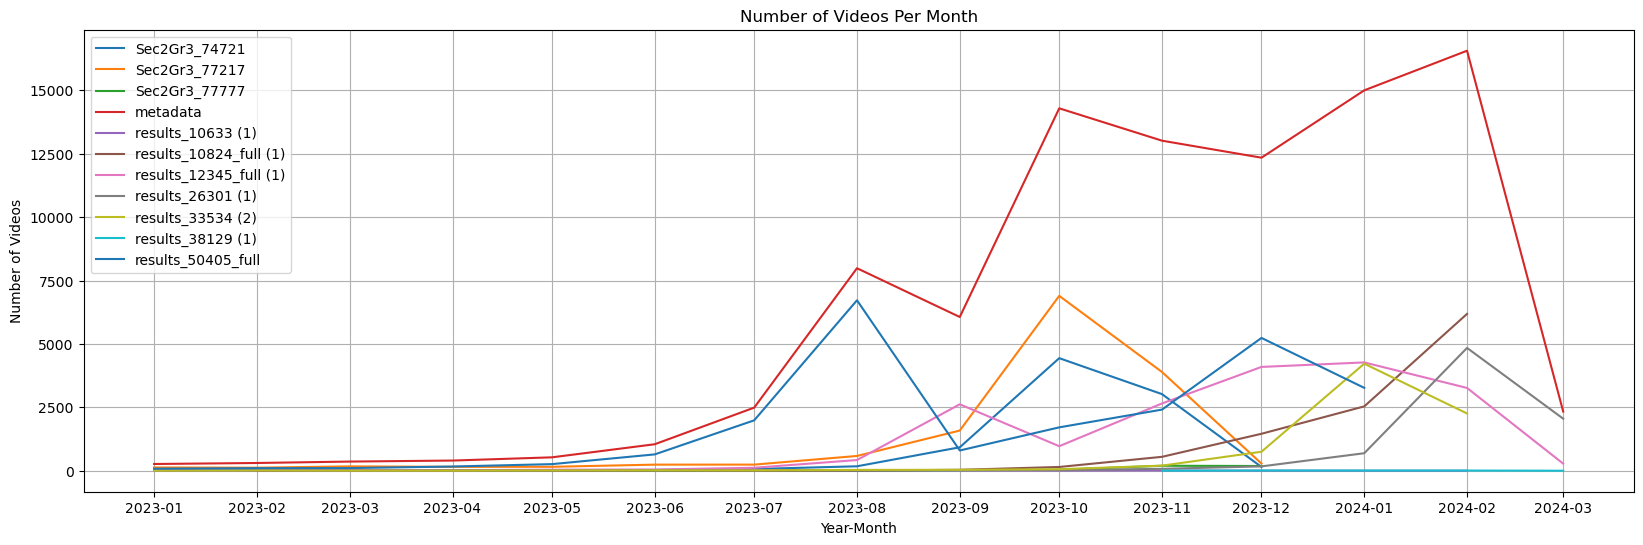

In [48]:
plt.figure(figsize=(20,6))
for user in users:
    user_data = videos_per_month[videos_per_month['user'] == user]
    plt.plot(user_data['year_month'].dt.to_timestamp(), user_data['count'], label=user)

# Formatting Date on X axis
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())

# Adding labels and title
plt.xlabel('Year-Month')
plt.ylabel('Number of Videos')
plt.title('Number of Videos Per Month')

# Addng legend for dif users 
plt.legend()

#  plot 
plt.grid(True)
#save to our file 
plt.savefig("/Users/naima.abdirahman/Desktop/cs315/videos_per_month_2023_2024.png")
plt.show()


In [15]:
plt.show()